In [1]:
# Palmer Penguins dataset https://github.com/mcnakhaee/palmerpenguins
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
penguins = load_penguins()
imputer = SimpleImputer(strategy='most_frequent')
penguins.iloc[:,:] = imputer.fit_transform(penguins)

penguins



species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen            41.1           17.0              190.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3         3800.0    male  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

In [3]:
palette = {'Adelie': '#FF8C00', 'Gentoo': '#159090', 'Chinstrap': '#A034F0'}
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target_names = np.array(['Adelie', 'Gentoo', 'Chinstrap'])

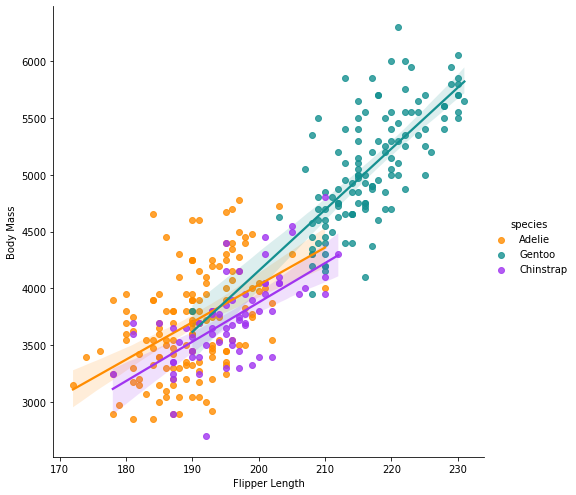

In [4]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette= palette)
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

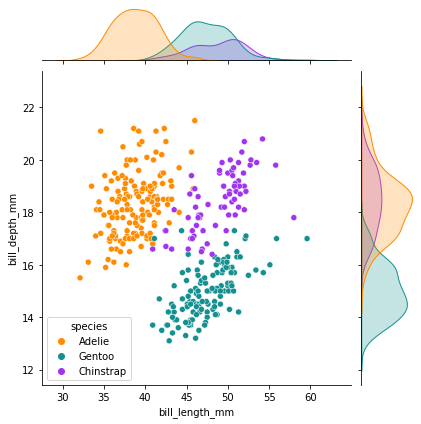

In [5]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette = palette)


<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

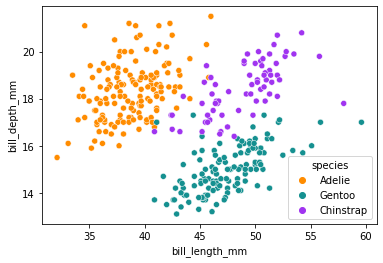

In [6]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette)

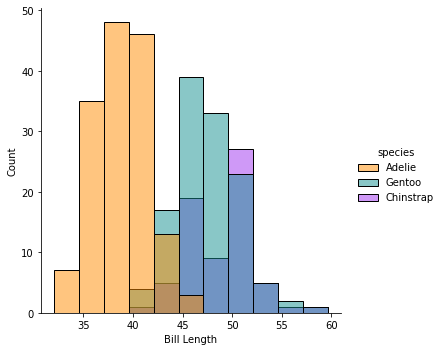

In [7]:
g1 = sns.displot(data=penguins, x='bill_length_mm', palette=palette, hue='species')
g1.set_xlabels('Bill Length')

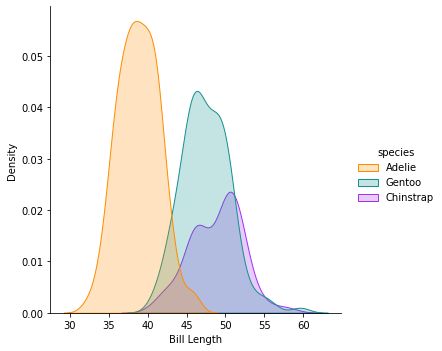

In [8]:
g2 = sns.displot(data=penguins, x='bill_length_mm', hue='species', palette=palette, kind='kde', fill=True)
g2.set_xlabels('Bill Length')

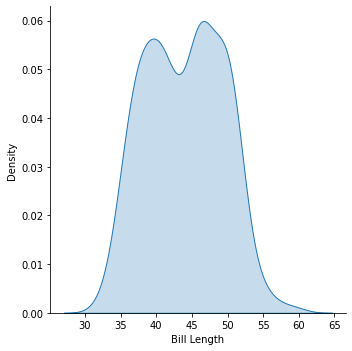

In [9]:
g3 = sns.displot(data=penguins, x='bill_length_mm', kind='kde', fill=True)
g3.set_xlabels('Bill Length')

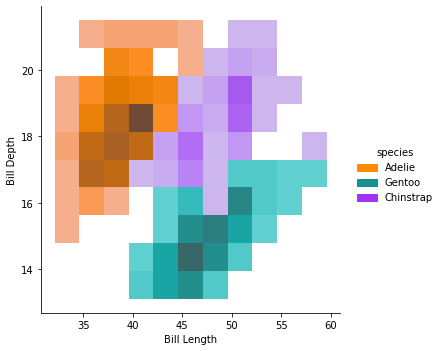

In [10]:
g4 = sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette)
g4.set_xlabels('Bill Length')
g4.set_ylabels('Bill Depth')

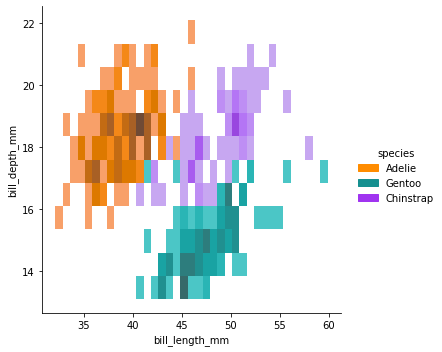

In [11]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', binwidth=0.75, hue='species', palette=palette)

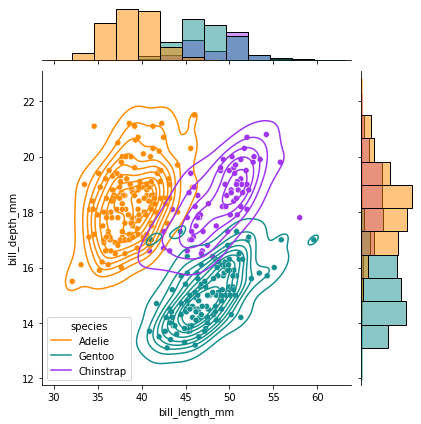

In [12]:
g = sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

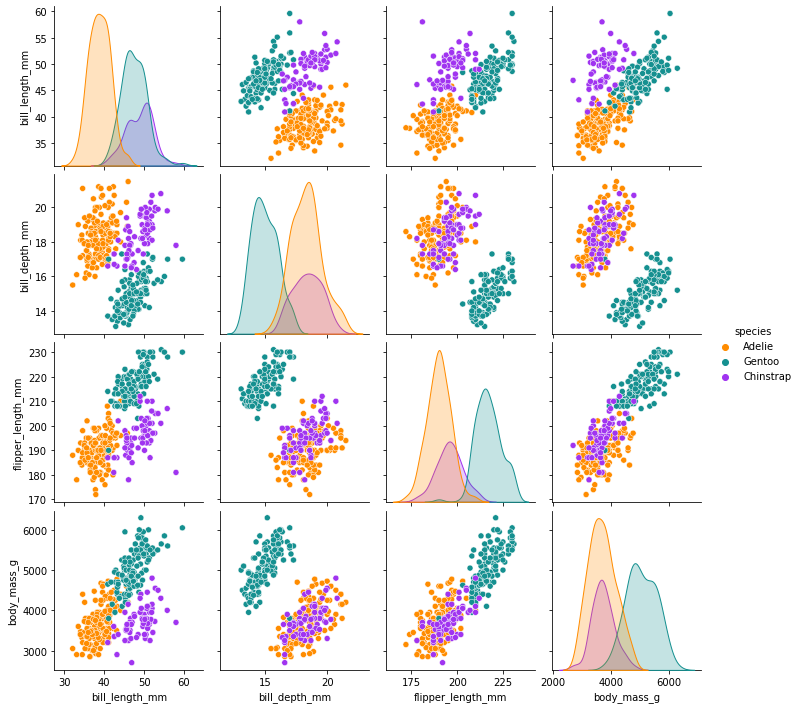

In [13]:
sns.pairplot(data=penguins, vars=penguins.columns[2:6], hue='species', palette=palette)

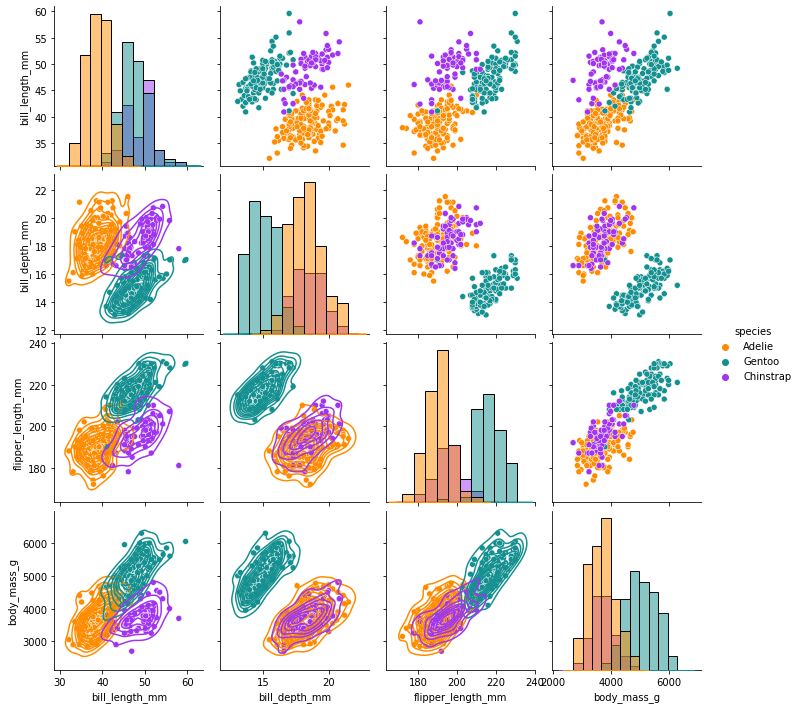

In [14]:
g = sns.pairplot(data=penguins, vars=penguins.columns[2:6], hue='species', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

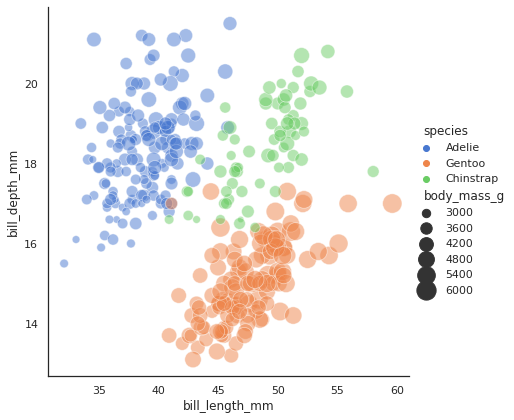

In [15]:
sns.set_theme(style="white")
sns.relplot(x="bill_length_mm", y="bill_depth_mm", hue="species", size="body_mass_g",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=penguins)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

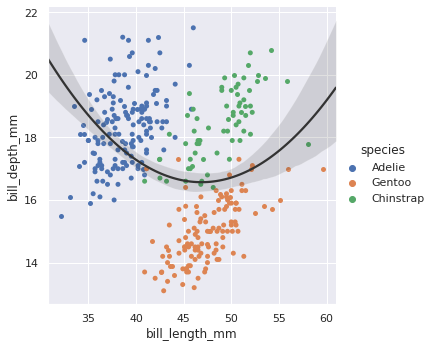

In [16]:
sns.set_theme()
sns.catplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species",
    native_scale=True, zorder=1
)
sns.regplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    scatter=False, truncate=False, order=2, color=".2",
)

In [17]:

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier


from sklearn import metrics

from sklearn.tree import plot_tree

In [18]:
var_columns = [c for c in penguins.columns if c not in ['species','island','sex','year']]
X = penguins.loc[:,var_columns]
y = penguins['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [19]:
model_tree_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
model_tree_2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [20]:
from graphviz import Source
from sklearn.tree import export_graphviz

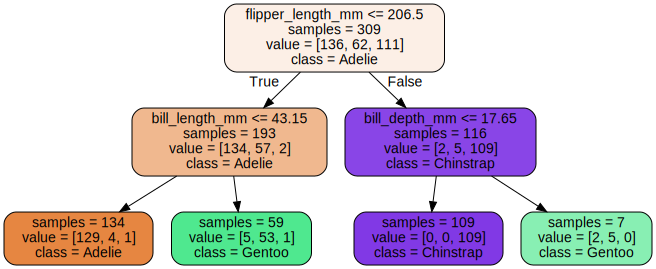

In [21]:
export_graphviz(model_tree_2, out_file='penguins.dot', feature_names=feature_names, class_names=target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins.dot')

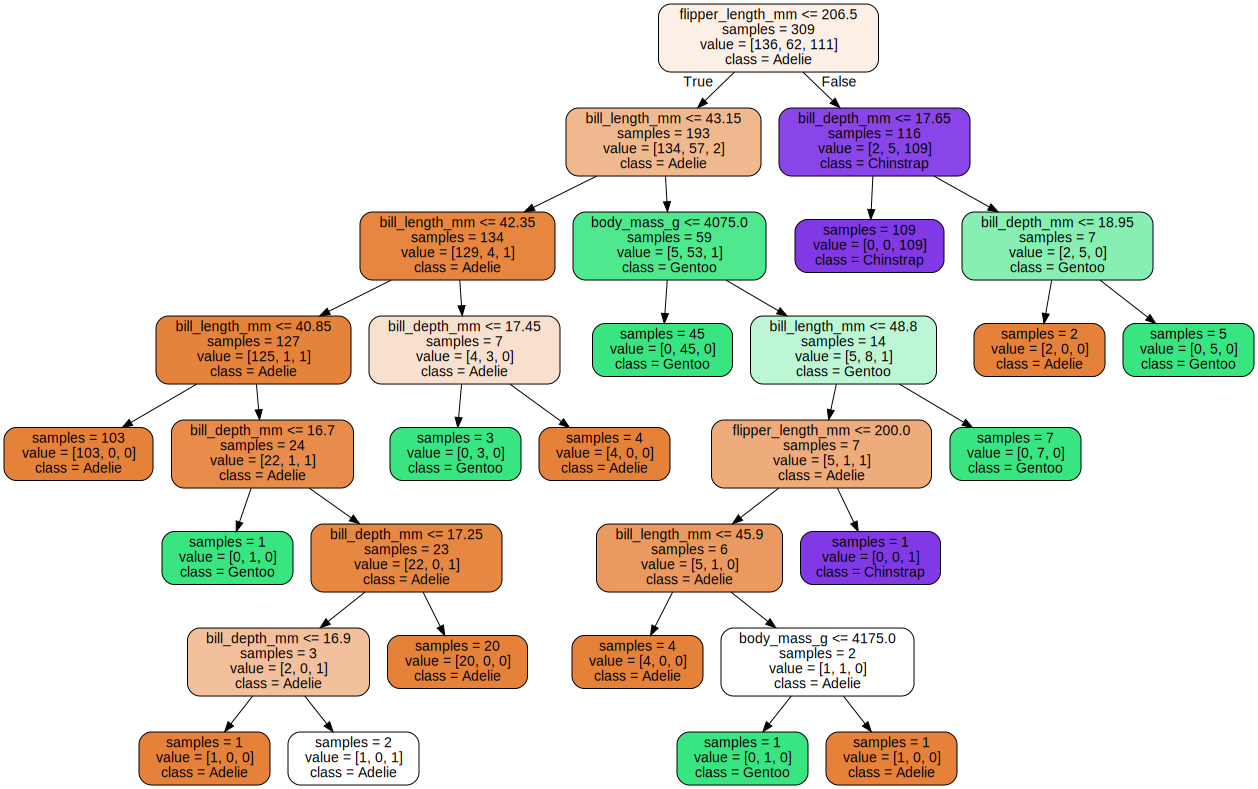

In [22]:
model_tree_0 = DecisionTreeClassifier(random_state=42)
model_tree_0.fit(X_train, y_train)
export_graphviz(model_tree_0, out_file='penguins.dot', feature_names=feature_names, class_names=target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins.dot')

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
res_pred = model_tree_0.predict(X_test)
score = accuracy_score(y_test, res_pred)
score

1.0

In [25]:
res_pred = model_tree_2.predict(X_test)
score = accuracy_score(y_test, res_pred)
score

0.9714285714285714

In [29]:
# Ta thấy với max_depth càng lớn thì ta càng áp dụng nhiều decision rule cho dataset từ đó tạo ra nhiều 
# decision boundary. Và về mặt lí thuyết nếu dữ liệu đầu vào để train được dán nhãn hợp lí thì max_depth càng lớn
# thì độ chính xác của mô hình càng cao tuy nhiên với những bộ dữ liệu khổng lồ max_depth quá lớn sẽ dẫn đến việc
# tiêu tốn quá nhiều tời gian và mô hình trở nên vô cùng phức tạp.

